<a href="https://colab.research.google.com/github/Alex-Ukraine/ml-selfedu/blob/main/VAE(theory).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Автоэнкодер воспроизводит изображение цифр по вектору скрытого состояния.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
input_img = Input((28, 28, 1)) # это слой

# сеть строим в виде связанного графа, 
# слой связываем его с предыдущим слоем
x = Flatten()(input_img) # вытягиваем вектор
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
# коллекция входных слоёв автоэнкодера
#encoded = Dense(49, activation='relu')(x) # слой(вектор) скрытого состояния
encoded = Dense(2, activation='linear')(x)

input_enc = Input(shape=(2,))
d = Dense(64, activation='relu')(input_enc)
d = Dense(28*28, activation='sigmoid')(d) # входные данные тоже от 0 до 1
decoded = Reshape((28, 28, 1))(d) # коллекция выходных слоёв автоэнкодера

# отдельно создаём модель энкодера и декодера
encoder = keras.Model(input_img, encoded, name="encoder")
decoder = keras.Model(input_enc, decoded, name="decoder")
# формируем модель автоэнкодера
autoencoder = keras.Model(input_img, decoder(encoder(input_img)), name="autoencoder") 
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [5]:
#batch_size = 100
batch_size = 64

autoencoder.fit(x_train, x_train, # автоэнкодер будет стараться восстанавливать наше изображение
                epochs=20,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0597
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0490
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0465
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0451
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0441
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0434
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0429
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0424
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0420
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0416
Epoch 11/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0413
Epoch 12/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0410
Epoch 13/20
938/938 [====

In [7]:
h = encoder.predict(x_test) # получим мноество точек которые соответствуют скрытому состоянию

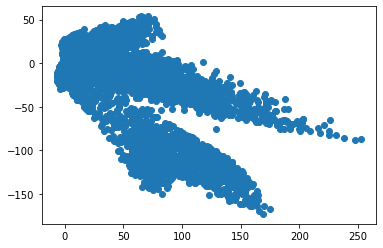

In [8]:
# распределение точек векторов скрытого состояния для тестового набора изображений
# характерная картина формирования модели области отображения входного сигнала в пространство скрытого состояния
a = plt.scatter(h[:, 0], h[:, 1])

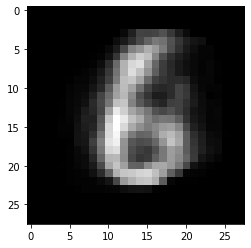

In [9]:
# дадим декодеру смоделировать нормальное изображение
# дадим точку, которую декодер сможет интерпретировать
img = decoder.predict(np.expand_dims([10, 10], axis=0))
plt.imshow(img.squeeze(), cmap='gray')

Мы не знаем какую точку выбрать чтобы получить нормальное изображение. Чтобы решить эту проблему пространство состояний должно быть компактным и представлять едуную цельную область, без существенных разделений, эту цель преследуют Вариационные Автоэнкдеры, Variational Autoencoders (VAE).